In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import plotting
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [6]:
df_flood = pd.read_csv('flood_danger_level.csv')

In [7]:
df_flood.head()

,DATE,WATER LEVEL (m),ACTUAL RAINFALL (mm),FLOOD DANGER LEVEL
0,01-07-2018,233.52,7.81,0
1,02-07-2018,233.64,11.29,1
2,03-07-2018,233.58,11.73,1
3,04-07-2018,233.69,11.36,1
4,05-07-2018,233.81,9.34,0


In [8]:
df_flood.tail()

,DATE,WATER LEVEL (m),ACTUAL RAINFALL (mm),FLOOD DANGER LEVEL
1092,27-06-2021,234.26,9.88,0
1093,28-06-2021,234.13,6.77,0
1094,29-06-2021,234.24,5.00,0
1095,30-06-2021,234.08,6.26,0
1096,01-07-2021,233.65,9.28,0


In [9]:
df_flood.describe()

,WATER LEVEL (m),ACTUAL RAINFALL (mm),FLOOD DANGER LEVEL
count,919.000000,1097.000000,1097.000000
mean,233.748814,7.709407,0.337284
std,0.387581,9.759295,0.581971
min,232.670000,0.000000,0.000000
25%,233.470000,0.970000,0.000000
50%,233.720000,4.060000,0.000000
75%,234.010000,11.460000,1.000000
max,234.960000,73.580000,3.000000


In [10]:
df_flood = df_flood.fillna(233.748814)

In [11]:
X = df_flood.iloc[:, [1, 2]].values
y = df_flood.iloc[:, -1].values

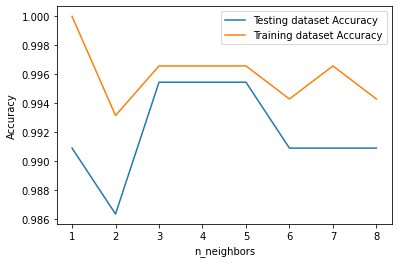

In [12]:
from sklearn.model_selection import train_test_split
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
 
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [18]:
cm

array([[158,   2,   0,   0],
       [  5,  49,   0,   0],
       [  0,   0,   5,   0],
       [  0,   0,   0,   1]], dtype=int64)

In [19]:
print("Accuracy:" ,ac*100,"%")

Accuracy: 96.81818181818181 %


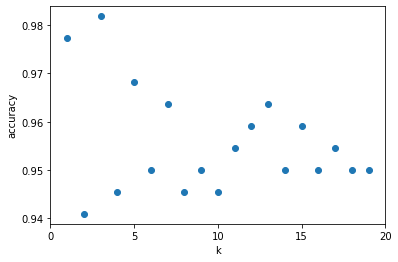

In [20]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

In [21]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [24]:
cm

array([[158,   2,   0,   0],
       [  1,  53,   0,   0],
       [  0,   1,   4,   0],
       [  0,   0,   0,   1]], dtype=int64)

In [25]:
print("Accuracy:" ,ac*100,"%")

Accuracy: 98.18181818181819 %


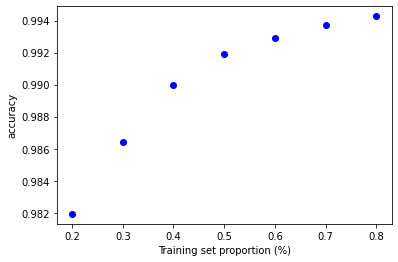

In [27]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 3)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');